In [1]:
import numpy as np, prjlib, binning as bins, plottools as pl
from matplotlib.pyplot import *

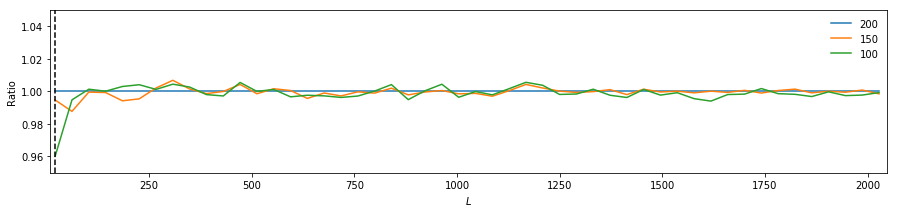

In [4]:
p, f = prjlib.filename_init(doreal='False',stype='lcmb')
mb = bins.multipole_binning(50,spc='',lmin=1)
pl.plot_1dstyle(ylab=r'Ratio',fsize=[15,3],xmin=10,xmax=2048,ymin=.95,ymax=1.05)
for si, s in enumerate([200,150,100]):
    f = p.quad.f['EB'].n0bl.replace('.dat','_n'+str(s).zfill(3)+'.dat')
    n0b = np.loadtxt(f,unpack=True)[1]
    nb = bins.binning(n0b,mb)
    if si==0: nb0=nb
    plot(mb.bc,nb/nb0,label=str(s))
axvline(20,color='k',ls='--')
legend(loc=0,frameon=False)
#savefig('fig_n0.png')